In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scapy.all import *

import sys
sys.path.append("..")
from generators.random_forest_generator import RFGenerator


In [2]:
rf_gen = RFGenerator()

Start building Random Forest


In [ ]:
####################################### aggregate .pcap into .csv #######################################

flow_length = 8

# dataset paths
pcap_tuesday = "../../../datasets/pcaps/Tuesday-WorkingHours.pcap"
pcap_wednesday = "../../../datasets/pcaps/Wednesday-WorkingHours.pcap"
pcap_thursday = "../../../datasets/pcaps/Thursday-WorkingHours.pcap"
pcap_friday = "../../../datasets/pcaps/Friday-WorkingHours.pcap"

pcap_paths = [pcap_tuesday, pcap_wednesday, pcap_thursday, pcap_friday]

# aggregate packets into flows
for path in pcap_paths:
    flow_save_path = path[: -4] + f"_sliced_flow_{flow_length}.csv"
    flow_save_path = "../../../datasets/" + path[24: -5] +  f"_sliced_flow_{flow_length}.csv"
    rf_gen.to_flow_sliced(path, flow_save_path, flow_length)

In [ ]:
####################################### preprocess each single dataset (no sliced) #######################################
import sys
sys.path.append("..")
from generators.random_forest_generator import RFGenerator

# sliced flow dataset pathes
dataset_tues_no_slice_path = f"../../../datasets/Tuesday-WorkingHours_no_slice.csv"
dataset_wed_no_slice_path = f"../../../datasets/Wednesday-WorkingHours_no_slice.csv"
dataset_thur_no_slice_path = f"../../../datasets/Thursday-WorkingHours_no_slice.csv"
dataset_fri_no_slice_path = f"../../../datasets/Friday-WorkingHours_no_slice.csv"

# preprocessed save path
dataset_tues_save_path = dataset_tues_no_slice_path[: -4] + "_preprocessed.csv"
dataset_wed_save_path = dataset_wed_no_slice_path[: -4] + "_preprocessed.csv"
dataset_thur_save_path = dataset_thur_no_slice_path[: -4] + "_preprocessed.csv"
dataset_fri_save_path = dataset_fri_no_slice_path[: -4] + "_preprocessed.csv"

rf_gen = RFGenerator()

# eliminate NFlow core features
features_to_eliminate = ['id',
                         'expiration_id',
                         'src_ip',
                         'src_mac',
                         'src_oui',
                         'src_port',
                         'dst_ip',
                         'dst_mac',
                         'dst_oui',
                         'dst_port',
                         'ip_version',
                         'vlan_id',
                         'tunnel_id',
                         'bidirectional_first_seen_ms',
                         'bidirectional_last_seen_ms',
                         'src2dst_first_seen_ms',
                         'src2dst_last_seen_ms',
                         'dst2src_first_seen_ms',
                         'dst2src_last_seen_ms',
                         'bidirectional_stddev_ps',
                         'src2dst_stddev_ps',
                         'dst2src_stddev_ps',
                         'bidirectional_stddev_piat_ms',
                         'src2dst_stddev_piat_ms',
                         'dst2src_stddev_piat_ms']


# do not need to consider the different protocol feature column, because the relevant features should not contain the protocol features. 
# Except TCP and UDP, the other protocols are not parsed in P4

# tuesday
rf_gen.preprocess_single_file(csv_path=dataset_tues_no_slice_path,
                              save_path=dataset_tues_save_path,
                              day="tuesday",
                              drop_columns=features_to_eliminate)
# wednesday
rf_gen.preprocess_single_file(csv_path=dataset_wed_no_slice_path,
                              save_path=dataset_wed_save_path,
                              day="wednesday",
                              drop_columns=features_to_eliminate)
# thursday
rf_gen.preprocess_single_file(csv_path=dataset_thur_no_slice_path,
                              save_path=dataset_thur_save_path,
                              day="thursday",
                              drop_columns=features_to_eliminate)
# friday
rf_gen.preprocess_single_file(csv_path=dataset_fri_no_slice_path,
                              save_path=dataset_fri_save_path,
                              day="friday",
                              drop_columns=features_to_eliminate)
                

In [ ]:
####################################### preprocess each single dataset (sliced) #######################################
flow_length = 8

# sliced flow dataset pathes
dataset_tues_sliced_path = f"../../../datasets/Tuesday-WorkingHours_sliced_flow_{flow_length}.csv"
dataset_wed_sliced_path = f"../../../datasets/Wednesday-WorkingHours_sliced_flow_{flow_length}.csv"
dataset_thur_sliced_path = f"../../../datasets/Thursday-WorkingHours_sliced_flow_{flow_length}.csv"
dataset_fri_sliced_path = f"../../../datasets/Friday-WorkingHours_sliced_flow_{flow_length}.csv"

# preprocessed save path
dataset_tues_save_path = dataset_tues_sliced_path[: -4] + "_preprocessed.csv"
dataset_wed_save_path = dataset_wed_sliced_path[: -4] + "_preprocessed.csv"
dataset_thur_save_path = dataset_thur_sliced_path[: -4] + "_preprocessed.csv"
dataset_fri_save_path = dataset_fri_sliced_path[: -4] + "_preprocessed.csv"

# categorical features. 
categorical_features = ['protocol',   
                        'splt_direction_1',
                        'splt_direction_2',
                        'splt_direction_3',
                        'splt_direction_4',
                        'splt_direction_5',
                        'splt_direction_6',
                        'splt_direction_7',
                        'splt_direction_8']

# eliminate NFlow core features
features_to_eliminate = ['id',
                         'expiration_id',
                         'src_ip',
                         'src_mac',
                         'src_oui',
                         'src_port',
                         'dst_ip',
                         'dst_mac',
                         'dst_oui',
                         'dst_port',
                         'ip_version',
                         'vlan_id',
                         'tunnel_id',
                         'bidirectional_first_seen_ms',
                         'bidirectional_last_seen_ms',
                         'src2dst_first_seen_ms',
                         'src2dst_last_seen_ms',
                         'dst2src_first_seen_ms',
                         'dst2src_last_seen_ms',
                         'bidirectional_stddev_ps',
                         'src2dst_stddev_ps',
                         'dst2src_stddev_ps',
                         'bidirectional_stddev_piat_ms',
                         'src2dst_stddev_piat_ms',
                         'dst2src_stddev_piat_ms']

# splt features (should be added with 1 to avoid -1)
splt_features = ['splt_piat_ms_1',
        	     'splt_piat_ms_2',
        	     'splt_piat_ms_3',
        	     'splt_piat_ms_4',
        	     'splt_piat_ms_5',
        	     'splt_piat_ms_6',
        	     'splt_piat_ms_7',
        	     'splt_piat_ms_8',
        	     'splt_ps_1',
        	     'splt_ps_2',
        	     'splt_ps_3',
        	     'splt_ps_4',
        	     'splt_ps_5',
        	     'splt_ps_6',
        	     'splt_ps_7',
        	     'splt_ps_8',
                 'splt_direction_1',
                 'splt_direction_2',
                 'splt_direction_3',
                 'splt_direction_4',
                 'splt_direction_5',
                 'splt_direction_6',
                 'splt_direction_7',
                 'splt_direction_8']

# do not need to consider the different protocol feature column, because the relevant features should not contain the protocol features. 
# Except TCP and UDP, the other protocols are not parsed in P4

# tuesday
rf_gen.preprocess_single_file(csv_path=dataset_tues_sliced_path,
                              save_path=dataset_tues_save_path,
                              day="tuesday",
                              drop_columns=features_to_eliminate,
                              categorical_columns=categorical_features,
                              splt_columns=splt_features)
# wednesday
rf_gen.preprocess_single_file(csv_path=dataset_wed_sliced_path,
                              save_path=dataset_wed_save_path,
                              day="wednesday",
                              drop_columns=features_to_eliminate,
                              categorical_columns=categorical_features,
                              splt_columns=splt_features)
# thursday
rf_gen.preprocess_single_file(csv_path=dataset_thur_sliced_path,
                              save_path=dataset_thur_save_path,
                              day="thursday",
                              drop_columns=features_to_eliminate,
                              categorical_columns=categorical_features,
                              splt_columns=splt_features)
# friday
rf_gen.preprocess_single_file(csv_path=dataset_fri_sliced_path,
                              save_path=dataset_fri_save_path,
                              day="friday",
                              drop_columns=features_to_eliminate,
                              categorical_columns=categorical_features,
                              splt_columns=splt_features)
                

In [ ]:
####################################### preprocess each single dataset (no sliced) keep 5 tuple #######################################
import sys
sys.path.append("..")
from generators.random_forest_generator import RFGenerator

# sliced flow dataset pathes
dataset_tues_no_slice_path = f"../../../datasets/Tuesday-WorkingHours_no_slice.csv"
dataset_wed_no_slice_path = f"../../../datasets/Wednesday-WorkingHours_no_slice.csv"
dataset_thur_no_slice_path = f"../../../datasets/Thursday-WorkingHours_no_slice.csv"
dataset_fri_no_slice_path = f"../../../datasets/Friday-WorkingHours_no_slice.csv"

# preprocessed save path
dataset_tues_save_path = dataset_tues_no_slice_path[: -4] + "_preprocessed_with_5tuple.csv"
dataset_wed_save_path = dataset_wed_no_slice_path[: -4] + "_preprocessed_with_5tuple.csv"
dataset_thur_save_path = dataset_thur_no_slice_path[: -4] + "_preprocessed_with_5tuple.csv"
dataset_fri_save_path = dataset_fri_no_slice_path[: -4] + "_preprocessed_with_5tuple.csv"

rf_gen = RFGenerator()

# do not need to consider the different protocol feature column, because the relevant features should not contain the protocol features. 
# Except TCP and UDP, the other protocols are not parsed in P4

# tuesday
rf_gen.preprocess_single_file(csv_path=dataset_tues_no_slice_path,
                              save_path=dataset_tues_save_path,
                              day="tuesday")
# wednesday
rf_gen.preprocess_single_file(csv_path=dataset_wed_no_slice_path,
                              save_path=dataset_wed_save_path,
                              day="wednesday")
# thursday
rf_gen.preprocess_single_file(csv_path=dataset_thur_no_slice_path,
                              save_path=dataset_thur_save_path,
                              day="thursday")
# friday
rf_gen.preprocess_single_file(csv_path=dataset_fri_no_slice_path,
                              save_path=dataset_fri_save_path,
                              day="friday")
                

In [47]:
####################################### check the number of attack flows (part 1)#######################################

dataset_tue_save_path = "../../../datasets/Tuesday-WorkingHours_no_slice_preprocessed_with_5tuple.csv"
dataset_wed_save_path = "../../../datasets/Wednesday-WorkingHours_no_slice_preprocessed_with_5tuple.csv"
dataset_thu_save_path = "../../../datasets/Thursday-WorkingHours_no_slice_preprocessed_with_5tuple.csv"
dataset_fri_save_path = "../../../datasets/Friday-WorkingHours_no_slice_preprocessed_with_5tuple.csv"

df_tue = pd.read_csv(dataset_tue_save_path)
df_wed = pd.read_csv(dataset_wed_save_path)
df_thu = pd.read_csv(dataset_thu_save_path)
df_fri = pd.read_csv(dataset_fri_save_path)


In [48]:
len(df_wed)

337293

In [46]:
####################################### check the number of attack flows (part 2)#######################################

# number of flow entries with "172.16.0.1" source ip
df_tue_src = df_tue[df_tue["src_ip"] == "172.16.0.1"]
# number of flow entries with "172.16.0.1" destination ip
df_tue_dst = df_tue[df_tue["dst_ip"] == "172.16.0.1"]
df_tue_attack = df_tue[df_tue["Label"] == 1]
print("--------------------- Tuesday ---------------------")
print(f"number of src flow: {len(df_tue_src)}")
print(f"number of dst flow: {len(df_tue_dst)}")
print(f"number of attack flow: {len(df_tue_attack)}")

df_wed_src = df_wed[df_wed["src_ip"] == "172.16.0.1"]
df_wed_dst = df_wed[df_wed["dst_ip"] == "172.16.0.1"]
df_wed_attack = df_wed[df_wed["Label"] == 1]
print("--------------------- Wednesday ---------------------")
print(f"number of src flow: {len(df_wed_src)}")
print(f"number of dst flow: {len(df_wed_dst)}")
print(f"number of attack flow: {len(df_wed_attack)}")


# df_thu_src = df_thu[(df_tue["src_ip"] == "172.16.0.1") | (df_tue["src_ip"] == "192.168.10.8")]
# df_thu_dst = df_thu[(df_tue["dst_ip"] == "172.16.0.1") | (df_tue["dst_ip"] == "192.168.10.8")]
# df_thu_attack = df_thu[df_tue["Label"] == 1]
# print("--------------------- Thursday ---------------------")
# print(f"number of src flow: {df_thu_src}")
# print(f"number of dst flow: {df_thu_dst}")
# print(f"number of attack flow: {df_thu_attack}")


# df_fri_src
# df_fri_dst
# df_fri_attack

--------------------- Tuesday ---------------------
number of src flow: 6954
number of dst flow: 236
number of attack flow: 6954
--------------------- Wednesday ---------------------
number of src flow: 30378
number of dst flow: 3095
number of attack flow: 30378


In [3]:
####################################### check the flow duration (sliced) (part 1) #######################################
flow_length = 8

# sliced flow dataset pathes
dataset_tues_sliced_preprocessed_path = f"../../../datasets/Tuesday-WorkingHours_sliced_flow_{flow_length}_preprocessed.csv"
dataset_wed_sliced_preprocessed_path = f"../../../datasets/Wednesday-WorkingHours_sliced_flow_{flow_length}_preprocessed.csv"
dataset_thur_sliced_preprocessed_path = f"../../../datasets/Thursday-WorkingHours_sliced_flow_{flow_length}_preprocessed.csv"
dataset_fri_sliced_preprocessed_path = f"../../../datasets/Friday-WorkingHours_sliced_flow_{flow_length}_preprocessed.csv"


df_preprocessed_tues = pd.read_csv(dataset_tues_sliced_preprocessed_path)
df_preprocessed_wed = pd.read_csv(dataset_wed_sliced_preprocessed_path)
df_preprocessed_thur = pd.read_csv(dataset_thur_sliced_preprocessed_path)
df_preprocessed_fri = pd.read_csv(dataset_fri_sliced_preprocessed_path)


In [6]:
####################################### check the flow duration (sliced) (part 2) #######################################
max_tues = max(df_preprocessed_tues["bidirectional_duration_ms"])
max_wed = max(df_preprocessed_wed["bidirectional_duration_ms"])
max_thur = max(df_preprocessed_thur["bidirectional_duration_ms"])
max_fir = max(df_preprocessed_fri["bidirectional_duration_ms"])

mean_tues = df_preprocessed_tues["bidirectional_duration_ms"].mean()
mean_wed = df_preprocessed_wed["bidirectional_duration_ms"].mean()
mean_thur = df_preprocessed_thur["bidirectional_duration_ms"].mean()
mean_fir = df_preprocessed_fri["bidirectional_duration_ms"].mean()

print(max_tues)
print(max_wed)
print(max_thur)
print(max_fir)

print(mean_tues)
print(mean_wed)
print(mean_thur)
print(mean_fir)



314685000
327020000
309919000
363033000
2346144.6315700714
3241544.7222444583
1637773.8667692505
1292591.413621342


In [12]:
# read no sliced dataset
flow_preprocess_dataset_tues_no_sliced_path = "../../../datasets/Tuesday-WorkingHours_no_slice_preprocessed.csv"
flow_preprocess_dataset_wed_no_sliced_path = "../../../datasets/Wednesday-WorkingHours_no_slice_preprocessed.csv"
flow_preprocess_dataset_thur_no_sliced_path = "../../../datasets/Thursday-WorkingHours_no_slice_preprocessed.csv"
flow_preprocess_dataset_fri_no_sliced_path = "../../../datasets/Friday-WorkingHours_no_slice_preprocessed.csv"

df_preprocessed_tues = pd.read_csv(flow_preprocess_dataset_tues_no_sliced_path)
df_preprocessed_wed = pd.read_csv(flow_preprocess_dataset_wed_no_sliced_path)
df_preprocessed_thur = pd.read_csv(flow_preprocess_dataset_thur_no_sliced_path)
df_preprocessed_fri = pd.read_csv(flow_preprocess_dataset_fri_no_sliced_path)

# the range of number of packets in flows are considered
indexes = np.arange(1, 16, 1)

# generate columns of .csv file
columns = []
for i in indexes:
    columns.append(f"flow_benign_gte_{i}")
for i in indexes:
    columns.append(f"flow_attack_gte_{i}")


In [15]:
str(columns).replace("'", '').replace(' ', '')

'[flow_benign_gte_1,flow_benign_gte_2,flow_benign_gte_3,flow_benign_gte_4,flow_benign_gte_5,flow_benign_gte_6,flow_benign_gte_7,flow_benign_gte_8,flow_benign_gte_9,flow_benign_gte_10,flow_benign_gte_11,flow_benign_gte_12,flow_benign_gte_13,flow_benign_gte_14,flow_benign_gte_15,flow_attack_gte_1,flow_attack_gte_2,flow_attack_gte_3,flow_attack_gte_4,flow_attack_gte_5,flow_attack_gte_6,flow_attack_gte_7,flow_attack_gte_8,flow_attack_gte_9,flow_attack_gte_10,flow_attack_gte_11,flow_attack_gte_12,flow_attack_gte_13,flow_attack_gte_14,flow_attack_gte_15]'

[301395,301329,245490,244576,117681,117416,100965,99209,93411,92739,88803,86846,85212,82763,80651,6954,6954,6954,6954,6954,6954,6950,6947,6942,6940,6933,6933,6923,6923,6922]


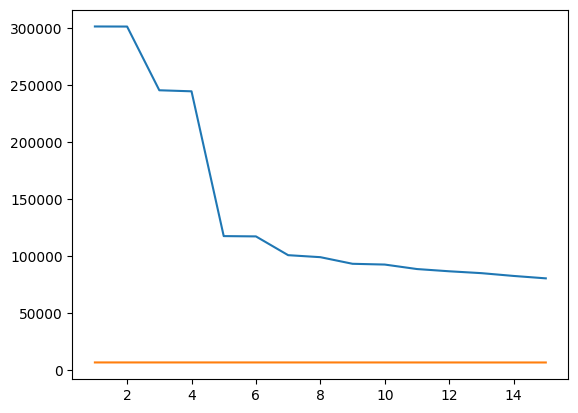

In [16]:
####################################### get the number of benign and attack flows (Tuesday) #######################################
benign_num_list_tues = []
attack_num_list_tues = []

for i in indexes:
    df_larger_than_n = df_preprocessed_tues[df_preprocessed_tues["bidirectional_packets"] >= i]
    benign_num, attack_num = np.bincount(df_larger_than_n["Label"])
    benign_num_list_tues.append(benign_num)
    attack_num_list_tues.append(attack_num)
    
# output string for csv file
print(str(benign_num_list_tues + attack_num_list_tues).replace(" ", ''))

# plot the distribution
plt.plot(indexes, benign_num_list_tues, label="benign flow")
plt.plot(indexes, attack_num_list_tues, label="attack flow")


[306915,306845,251340,250852,118937,118775,102554,100434,94796,94210,90163,88228,86641,84218,81373,30378,30330,29906,28266,28265,28253,28088,24957,24942,24662,23862,22920,22326,21434,19849]


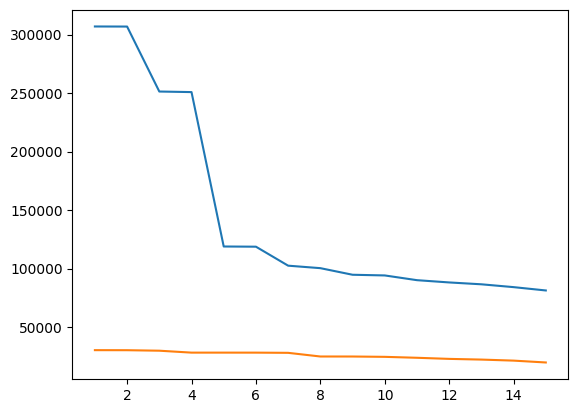

In [17]:
####################################### get the number of benign and attack flows (Wednesday) #######################################
benign_num_list_wed = []
attack_num_list_wed = []

for i in indexes:
    df_larger_than_n = df_preprocessed_wed[df_preprocessed_wed["bidirectional_packets"] >= i]
    benign_num, attack_num = np.bincount(df_larger_than_n["Label"])
    benign_num_list_wed.append(benign_num)
    attack_num_list_wed.append(attack_num)
    
# output string for csv file
print(str(benign_num_list_wed + attack_num_list_wed).replace(" ", ''))

# plot the distribution
plt.plot(indexes, benign_num_list_wed, label="benign flow")
plt.plot(indexes, attack_num_list_wed, label="attack flow")

[252567,252487,200709,200430,99090,98864,81851,80299,76368,75825,71997,70681,69587,66775,64314,90567,90566,58550,58462,13009,13004,10627,10452,10023,9946,9372,9220,9064,8920,8482]


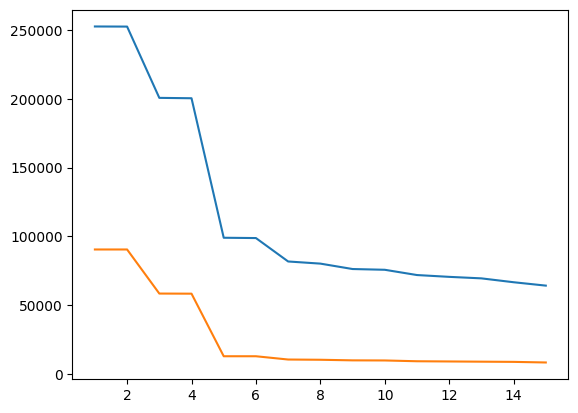

In [18]:
####################################### get the number of benign and attack flows (Thursday) #######################################
benign_num_list_thur = []
attack_num_list_thur = []

for i in indexes:
    df_larger_than_n = df_preprocessed_thur[df_preprocessed_thur["bidirectional_packets"] >= i]
    benign_num, attack_num = np.bincount(df_larger_than_n["Label"])
    benign_num_list_thur.append(benign_num)
    attack_num_list_thur.append(attack_num)
    
# output string for csv file
print(str(benign_num_list_thur + attack_num_list_thur).replace(" ", ''))

# plot the distribution
plt.plot(indexes, benign_num_list_thur, label="benign flow")
plt.plot(indexes, attack_num_list_thur, label="attack flow")

[275210,275137,224827,224460,104041,103848,87078,85824,81347,80717,76594,74316,72824,70263,68051,225886,225489,67176,66532,65811,65810,64482,64479,64408,63774,63606,59813,53339,43217,34998]


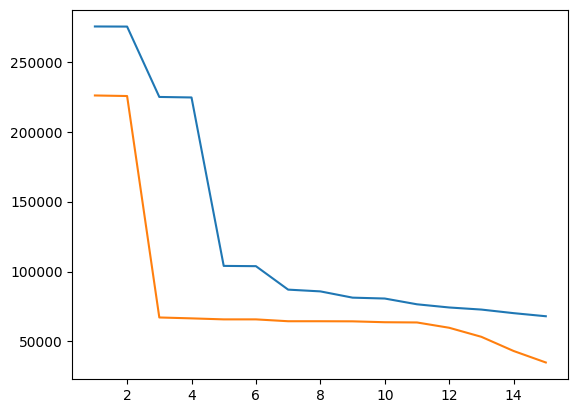

In [19]:
####################################### get the number of benign and attack flows (Friday) #######################################
benign_num_list_fri = []
attack_num_list_fri = []

for i in indexes:
    df_larger_than_n = df_preprocessed_fri[df_preprocessed_fri["bidirectional_packets"] >= i]
    benign_num, attack_num = np.bincount(df_larger_than_n["Label"])
    benign_num_list_fri.append(benign_num)
    attack_num_list_fri.append(attack_num)
    
# output string for csv file
print(str(benign_num_list_fri + attack_num_list_fri).replace(" ", ''))

# plot the distribution
plt.plot(indexes, benign_num_list_fri, label="benign flow")
plt.plot(indexes, attack_num_list_fri, label="attack flow")

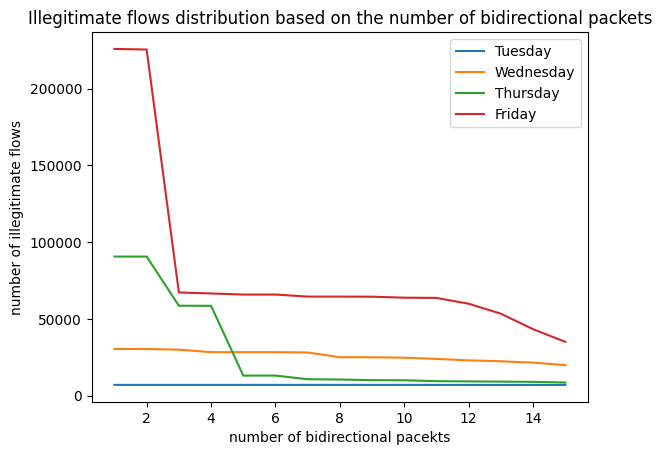

In [19]:
plt.plot(indexes, attack_num_list_tues, label="Tuesday")
plt.plot(indexes, attack_num_list_wed, label="Wednesday")
plt.plot(indexes, attack_num_list_thur, label="Thursday")
plt.plot(indexes, attack_num_list_fri, label="Friday")
plt.legend(loc='upper right')
plt.title("Illegitimate flows distribution based on the number of bidirectional packets")
plt.xlabel("number of bidirectional pacekts")
plt.ylabel("number of illegitimate flows")
plt.show()

In [22]:
max_tues = max(df_preprocessed_tues["bidirectional_duration_ms"])
max_wed = max(df_preprocessed_wed["bidirectional_duration_ms"])
max_thur = max(df_preprocessed_thur["bidirectional_duration_ms"])
max_fir = max(df_preprocessed_fri["bidirectional_duration_ms"])
max_flow_duration = max(max_tues, max_wed, max_thur, max_fir)

print(f"max tues: {max_tues} microseconds")
# TODO: * 1000 for the wednesday dataset during preprocessing
print(f"max wed: {max_wed} microseconds")
print(f"max thur: {max_thur} microseconds")
print(f"max fir: {max_fir} microseconds")
print(f"MAX of four days: {max_flow_duration} microseconds")
print(f"MAX of four days: {max_flow_duration / 1000000 / 60} mins")


max tues: 1797965000 microseconds
max wed: 1799965000 microseconds
max thur: 1799110000 microseconds
max fir: 1799960000 microseconds
MAX of four days: 1799965000 microseconds
MAX of four days: 29.999416666666665 mins


In [13]:
attack_df = df_preprocessed_tues[df_preprocessed_tues["Label"] == 1]
attack_num = len(attack_df)
attack_tcp_df = attack_df[attack_df["protocol_6"] == 1]
attack_tcp_num = len(attack_tcp_df)
attacks_udp_df = attack_df[attack_df["protocol_17"] == 1]
attack_udp_num = len(attacks_udp_df)
print(f"attack number: {attack_num}")
print(f"attack TCP number: {attack_tcp_num}")
print(f"attack UDP number: {attack_udp_num}")
print(f"attack others number: {attack_num - attack_tcp_num - attack_udp_num}")


attack number: 6954
attack TCP number: 6954
attack UDP number: 0
attack others number: 0


In [14]:
attack_df = df_preprocessed_wed[df_preprocessed_wed["Label"] == 1]
attack_num = len(attack_df)
attack_tcp_df = attack_df[attack_df["protocol_6"] == 1]
attack_tcp_num = len(attack_tcp_df)
attacks_udp_df = attack_df[attack_df["protocol_17"] == 1]
attack_udp_num = len(attacks_udp_df)
print(f"attack number: {attack_num}")
print(f"attack TCP number: {attack_tcp_num}")
print(f"attack UDP number: {attack_udp_num}")
print(f"attack others number: {attack_num - attack_tcp_num - attack_udp_num}")


attack number: 6954
attack TCP number: 6954
attack UDP number: 0
attack others number: 0


In [15]:
attack_df = df_preprocessed_thur[df_preprocessed_thur["Label"] == 1]
attack_num = len(attack_df)
attack_tcp_df = attack_df[attack_df["protocol_6"] == 1]
attack_tcp_num = len(attack_tcp_df)
attacks_udp_df = attack_df[attack_df["protocol_17"] == 1]
attack_udp_num = len(attacks_udp_df)
print(f"attack number: {attack_num}")
print(f"attack TCP number: {attack_tcp_num}")
print(f"attack UDP number: {attack_udp_num}")
print(f"attack others number: {attack_num - attack_tcp_num - attack_udp_num}")


attack number: 90567
attack TCP number: 75848
attack UDP number: 14655
attack others number: 64


In [16]:
attack_df = df_preprocessed_fri[df_preprocessed_fri["Label"] == 1]
attack_num = len(attack_df)
attack_tcp_df = attack_df[attack_df["protocol_6"] == 1]
attack_tcp_num = len(attack_tcp_df)
attacks_udp_df = attack_df[attack_df["protocol_17"] == 1]
attack_udp_num = len(attacks_udp_df)
print(f"attack number: {attack_num}")
print(f"attack TCP number: {attack_tcp_num}")
print(f"attack UDP number: {attack_udp_num}")
print(f"attack others number: {attack_num - attack_tcp_num - attack_udp_num}")

print()

attack number: 225886
attack TCP number: 225610
attack UDP number: 268
attack others number: 8



In [6]:
pcap_dataset_path = "../../../datasets/pcaps/Tuesday-WorkingHours_attack.pcap"
attack_1_part_output_path = "../../../datasets/pcaps/Tuesday-WorkingHours_attack_1_part.pcap"
attack_2_part_output_path = "../../../datasets/pcaps/Tuesday-WorkingHours_attack_2_part.pcap"

pcap_dataset = rdpcap(pcap_dataset_path)
pkt_num = len(pcap_dataset)
print("Finished reading Tuesday attack pcap dataset.")
print(f"Tuesday total attack packet number: {pkt_num}")

Finished reading Tuesday attack pcap dataset.
Tuesday total attack packet number: 281202


In [18]:
# find the timestamp of the last packet in the fisrt part
pre_time = pcap_dataset[0].time
max_interval = 0
last_timestamp_1_part = 0
for pkt in pcap_dataset:
    temp_interval = pkt.time - pre_time
    if(temp_interval > max_interval):
        max_interval = temp_interval
        last_timestamp_1_part = pre_time
    pre_time = pkt.time
print(f"maximum time interval: {max_interval}")
print(f"timestamp of the last packet in the first part attack: {last_timestamp_1_part}")

# extract the two parts attack
attack_1_part_list = []
attack_2_part_list = []
for pkt in pcap_dataset:
    if (pkt.time > last_timestamp_1_part):
        attack_2_part_list.append(pkt)
    else:
        attack_1_part_list.append(pkt)
wrpcap(attack_1_part_output_path, attack_1_part_list)
wrpcap(attack_2_part_output_path, attack_2_part_list)
print(f"Tuesday first part attack packet number: {len(attack_1_part_list)}")
print(f"Tuesday second part attack packet number: {len(attack_2_part_list)}")

maximum time interval: 13132.322919
timestamp of the last packet in the first part attack: 1499175008.726697
Tuesday first part attack packet number: 111618
Tuesday second part attack packet number: 169584
